# Theoretical background

The goal here is to simulate quantitatively radioactive decay process.

Let's assume that we want to investigate the sample with $N = 10.000$  atoms of a substance of half-life $t_{1/2}= 30h$. From the definition of "half-life" we know that every 30 h the number of atoms in the sample halves - approximately half of the atoms decay (alpha, beta or gamma), the other half remain intact.

# Simulation:

We create two objects: Nuclei and Net.

The net is in the form of a regular lattice of size [xx, yy]. In every node we place a nuclei.
Nuclei could be in one of two states: 1 - not decayed (color black), 0 - decayed  (color green)
At the beginning (time = 0) all nuclei are "not decayed".
In every iteration some atoms decay (probability of decay within time $\Delta t$ is equal to $0.5^{\Delta t/ t_{1/2}}$) and some remains intact.


We start at time t = 0 h and end at t = 300 h. Every iteration corresponds to one hour. Half-life time $t_{1/2}$ is expressed in hours as well. In every iteration we update and print the net (update process consists of going through all nodes, it is not a monte carlo simulation)

We may see that:
* after 30h the number of nuclei that decay is approximately equal to 50%.  (50 % of all nuclei did not decay)
* after 2* 30 h = 60 h the number of nuclei that decay is approximately equal to 50% + 25% = 75 %   (25 % of all nuclei did not decay)
* after 3* 30 h = 90 h the number of nuclei that decay is approximately equal to 50% + 25% + 12.5 % = 87.5  %  (12.5  % of all nuclei did not decay)
* after 4* 30 h = 120 h the number of nuclei that decay is approximately equal to 50% + 25% + 12.5 % = 93.75  % (6.25  % of all nuclei did not decay)
and so on.

We may plot the number of atoms that not-decayed after every hour and  the number of atoms that decayed every hour. We get exponential plot:

$$N(t) = N_0 \cdot e^{-\lambda \cdot t}$$
where:
$\lambda = \frac{ln(2)}{t_{1/2}} $

In [1]:
import numpy as np

import numpy as np
import pandas as pd
import sys

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from copy import deepcopy
from math import sqrt

In [2]:
class Nuclei():
    
    def __init__(self, xx, yy, state = 1): 
       
        self.coordinate_x = xx
        self.coordinate_y = yy
        self.state = state      ## state = 1 - before decay, state = 0 after decay
      
    def update(self):
        self.state = 0
        
    def get_state(self):
        return self.state
                           

In [3]:
class Net():
    def __init__(self,xx,yy, half_life=1): 
        
        self.size_x = xx
        self.size_y = yy
        self.size = xx*yy
        self.nuclei = []
        self.decayed_nuclei = 0
        self.not_decayed_nuclei = xx*yy
        self.half_life = half_life
        
        for x in range(xx):
            tmp = []
            for y in range(yy):
                tmp.append( Nuclei(x, y))
            self.nuclei.append(tmp)

 
    def __repr__(self):
        return repr((self.size_x, self.size_y))      
 

   
    def update(self,  Δt):
        for x in range(self.size_x):
            for y in range(self.size_y):
                if self.nuclei[x][y].get_state() != 0:
                    if np.random.rand() >  0.5**(Δt / self.half_life):
                        self.nuclei[x][y].update()
                        self.decayed_nuclei +=1
                        self.not_decayed_nuclei -= 1

        return self.not_decayed_nuclei, self.decayed_nuclei
                        
          
        
    def print_my_net(self, tt):

        cmap = LinearSegmentedColormap.from_list('myCMAP1',['green', 'black'],  N = 2)
        data = np.zeros([self.size_x, self.size_y])
        
        for x in range(self.size_x):
            for y in range(self.size_y):
                
                data[x][y] = self.nuclei[x][y].get_state()
        
        plt.subplot()
        plt.imshow(data, cmap=cmap, origin = 'lower')
        plt.colorbar(ticks=range(2), label='nuclei type')
        plt.title("time: {:} h, decayed: {:} which is {:} %".format(tt, self.decayed_nuclei, int(self.decayed_nuclei*100 / self.size)))
        plt.clim(0,1)
        plt.show()     
                            

In [4]:
size_x = 100
size_y = 100

Δt = 1
half_life=30

number_of_iterations = 180

not_decay_arr = np.zeros(number_of_iterations+1)
decay_arr = np.zeros(number_of_iterations+1)
t_arr = np.zeros(number_of_iterations+1)
not_decay_arr[0] = size_x*size_y



time = 0 h


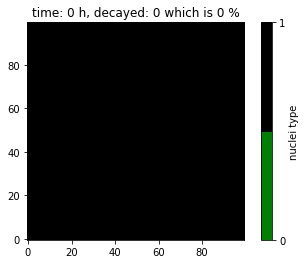



time = 1 h


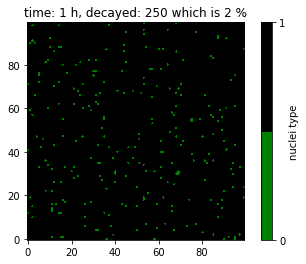



time = 2 h


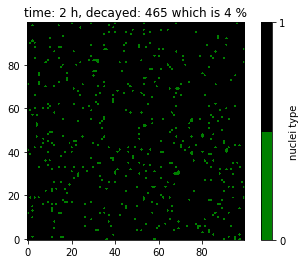



time = 3 h


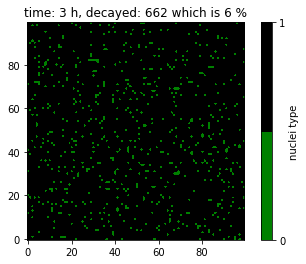



time = 4 h


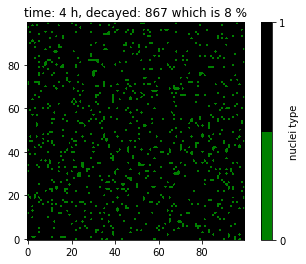



time = 5 h


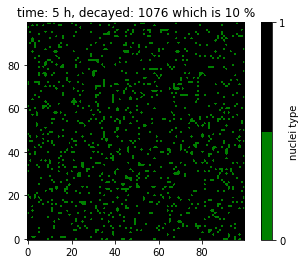



time = 6 h


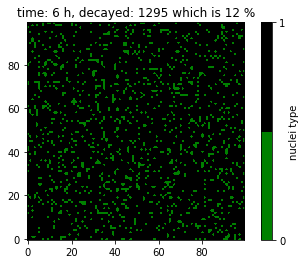



time = 7 h


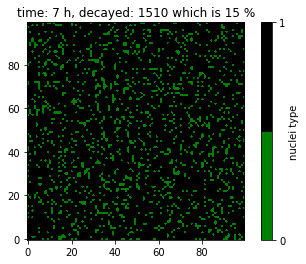



time = 8 h


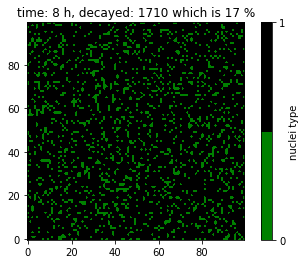



time = 9 h


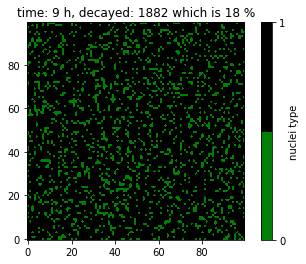



time = 10 h


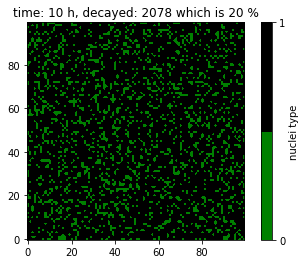



time = 11 h


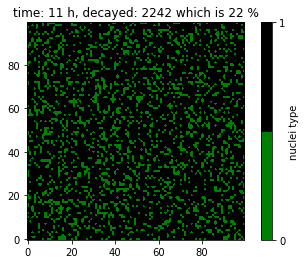



time = 12 h


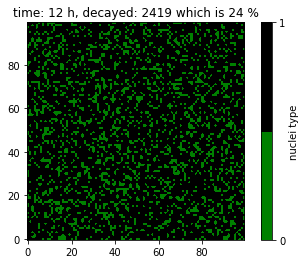



time = 13 h


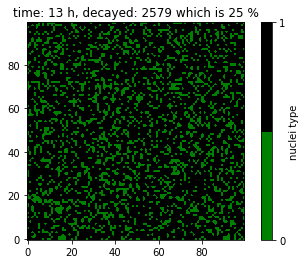



time = 14 h


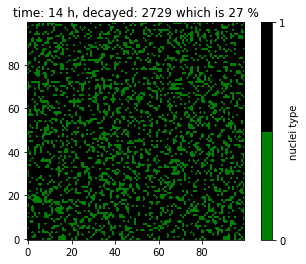



time = 15 h


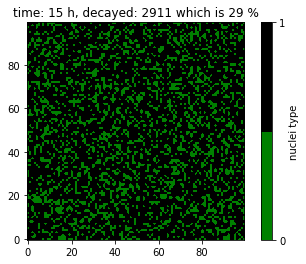



time = 16 h


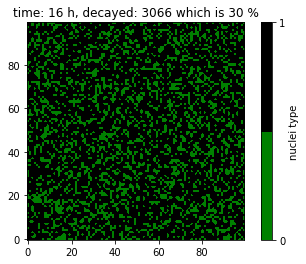



time = 17 h


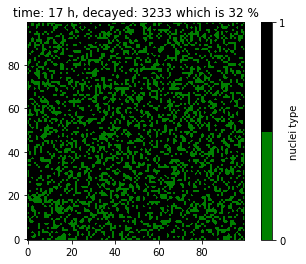



time = 18 h


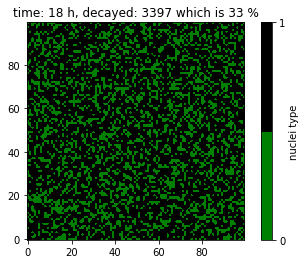



time = 19 h


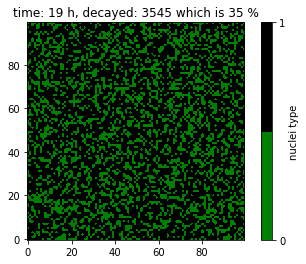



time = 20 h


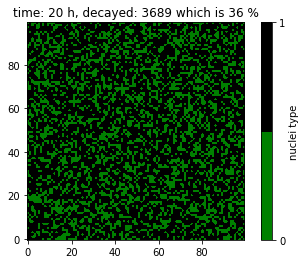



time = 21 h


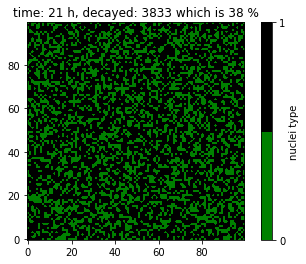



time = 22 h


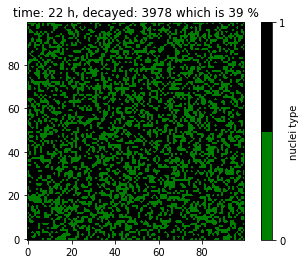



time = 23 h


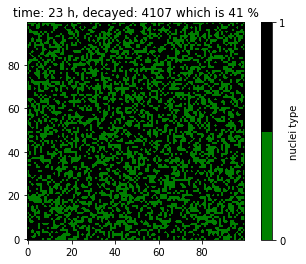



time = 24 h


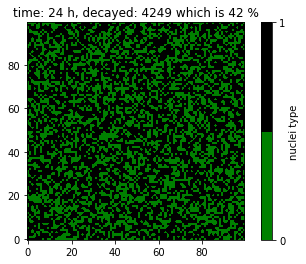



time = 25 h


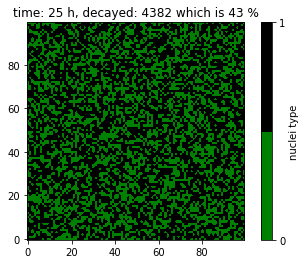



time = 26 h


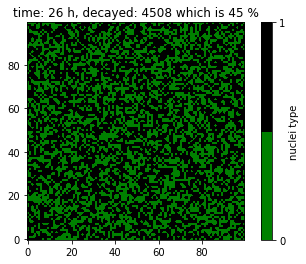



time = 27 h


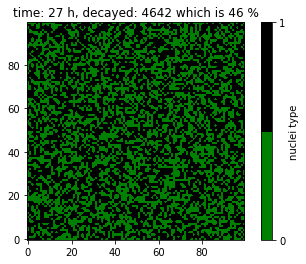



time = 28 h


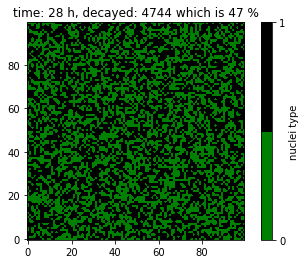



time = 29 h


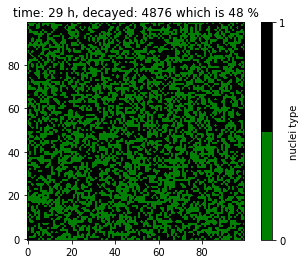



time = 30 h


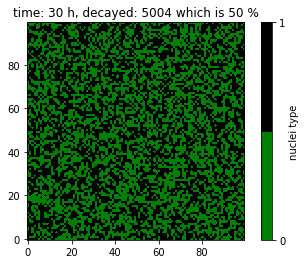



time = 31 h


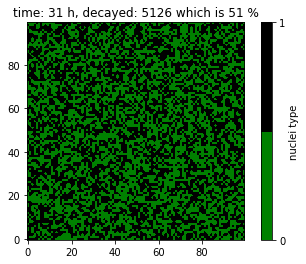



time = 32 h


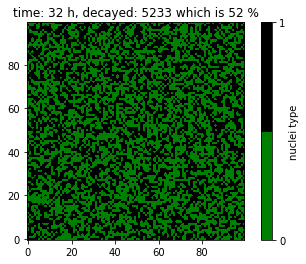



time = 33 h


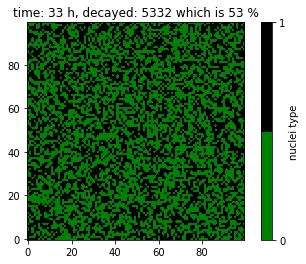



time = 34 h


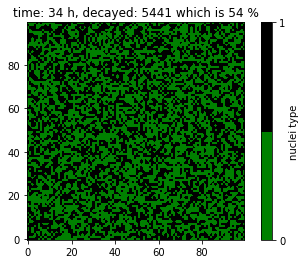



time = 35 h


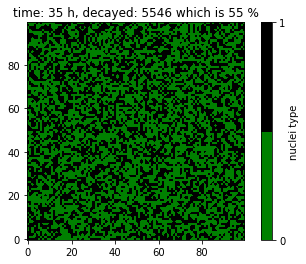



time = 36 h


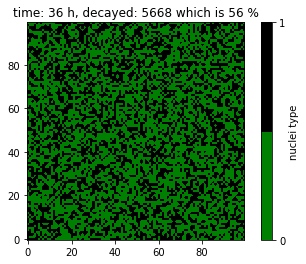



time = 37 h


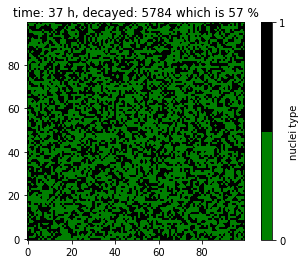



time = 38 h


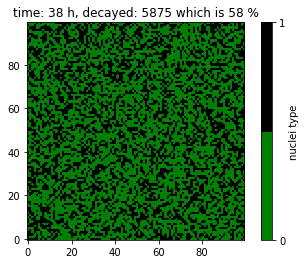



time = 39 h


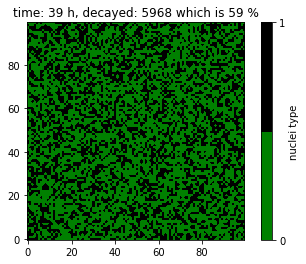



time = 40 h


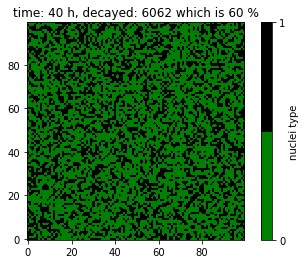



time = 41 h


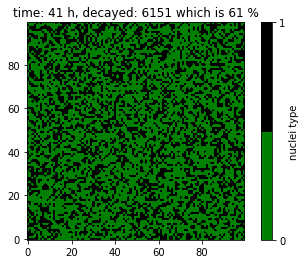



time = 42 h


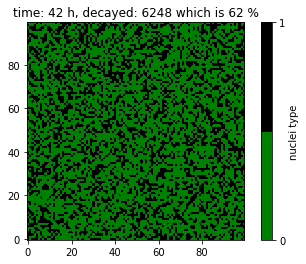



time = 43 h


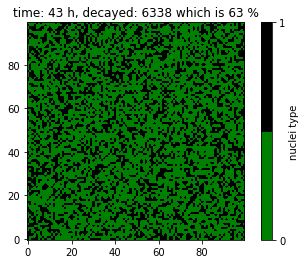



time = 44 h


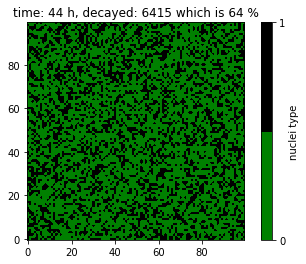



time = 45 h


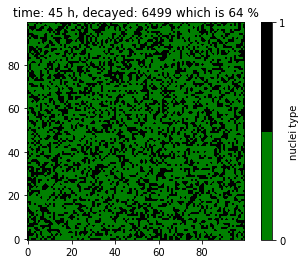



time = 46 h


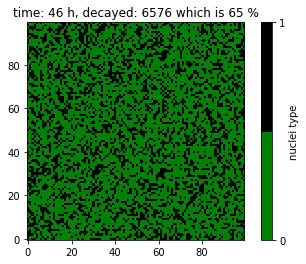



time = 47 h


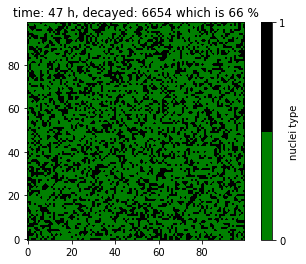



time = 48 h


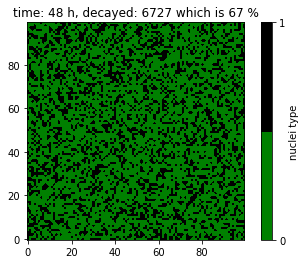



time = 49 h


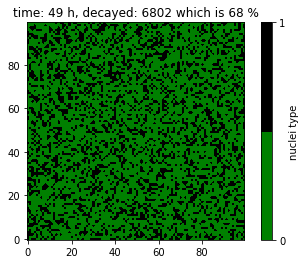



time = 50 h


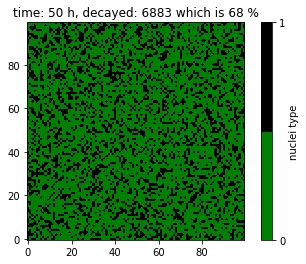



time = 51 h


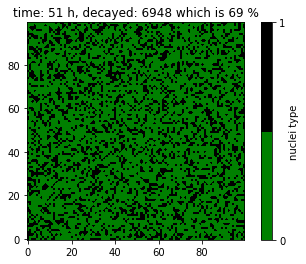



time = 52 h


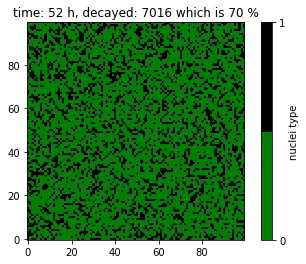



time = 53 h


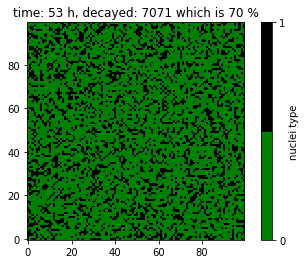



time = 54 h


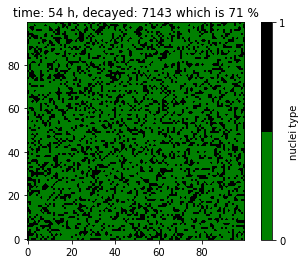



time = 55 h


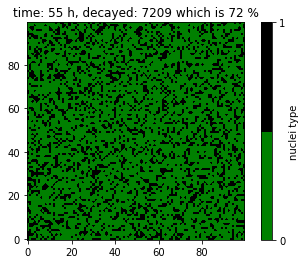



time = 56 h


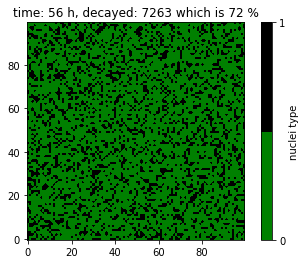



time = 57 h


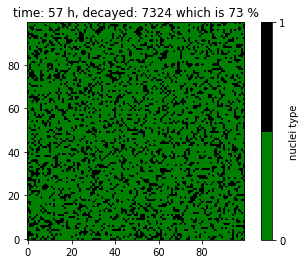



time = 58 h


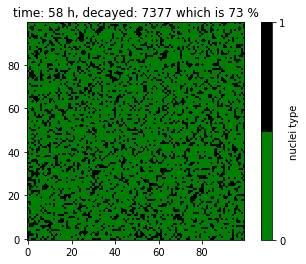



time = 59 h


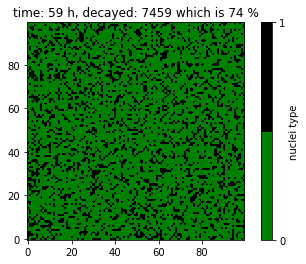



time = 60 h


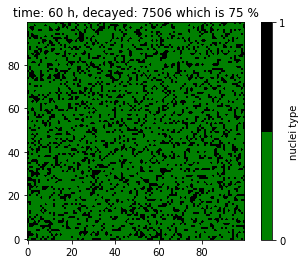



time = 61 h


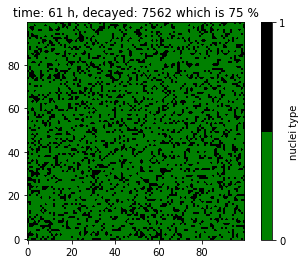



time = 62 h


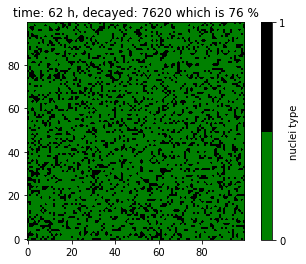



time = 63 h


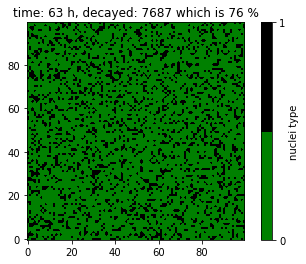



time = 64 h


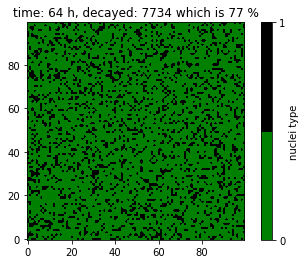



time = 65 h


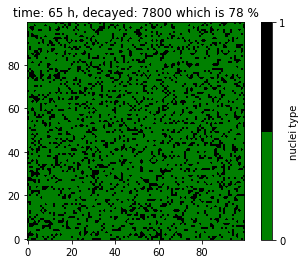



time = 66 h


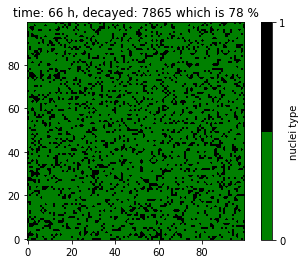



time = 67 h


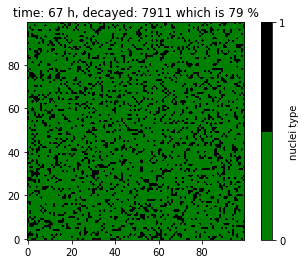



time = 68 h


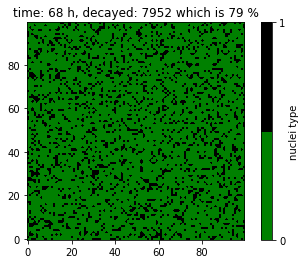



time = 69 h


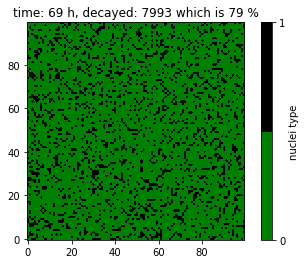



time = 70 h


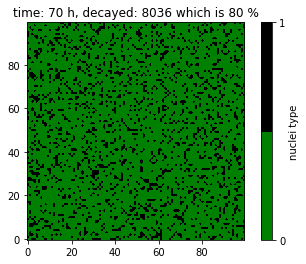



time = 71 h


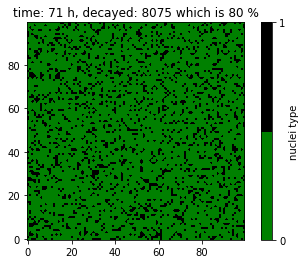



time = 72 h


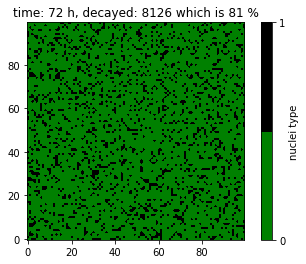



time = 73 h


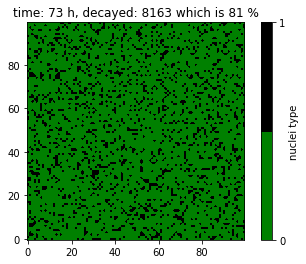



time = 74 h


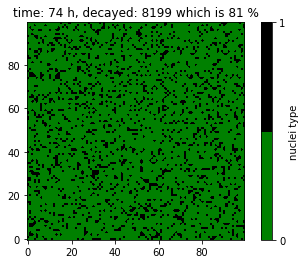



time = 75 h


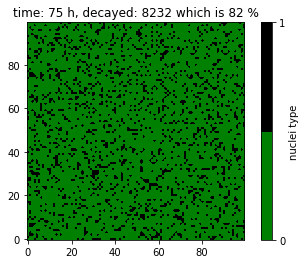



time = 76 h


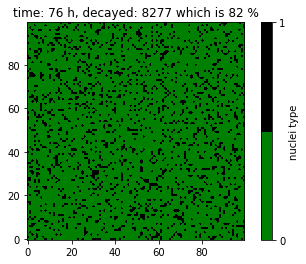



time = 77 h


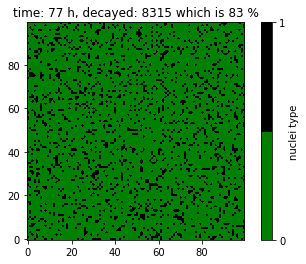



time = 78 h


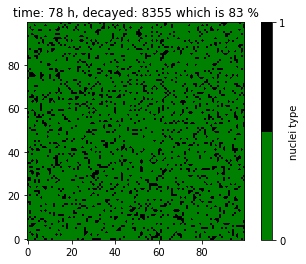



time = 79 h


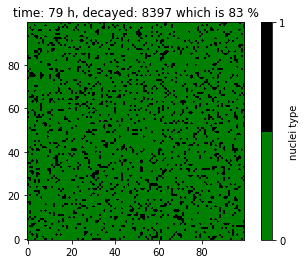



time = 80 h


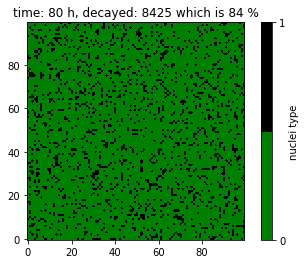



time = 81 h


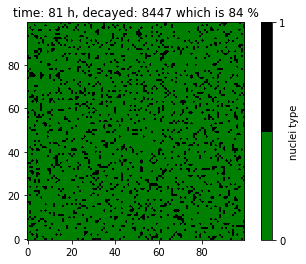



time = 82 h


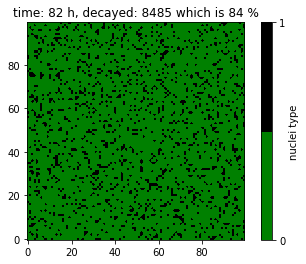



time = 83 h


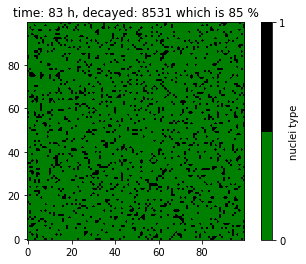



time = 84 h


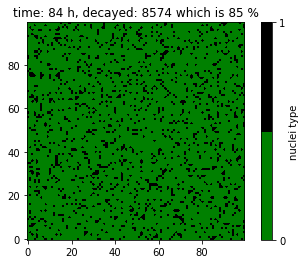



time = 85 h


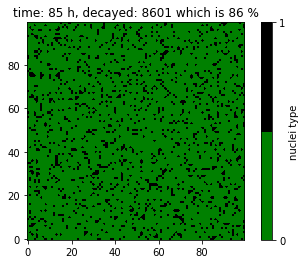



time = 86 h


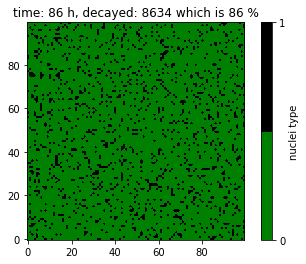



time = 87 h


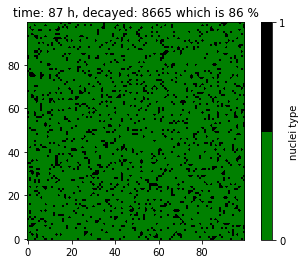



time = 88 h


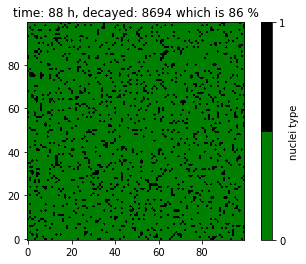



time = 89 h


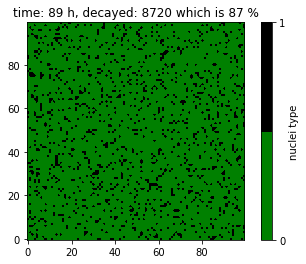



time = 90 h


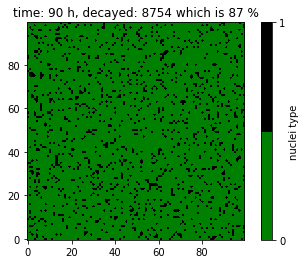



time = 91 h


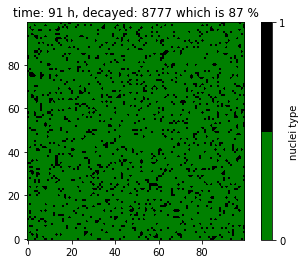



time = 92 h


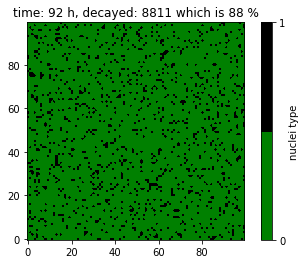



time = 93 h


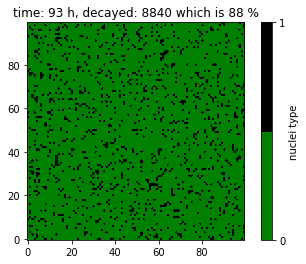



time = 94 h


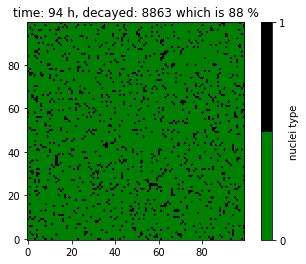



time = 95 h


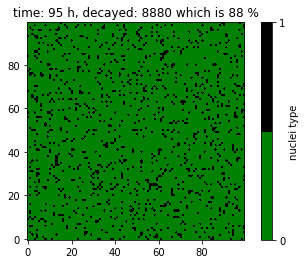



time = 96 h


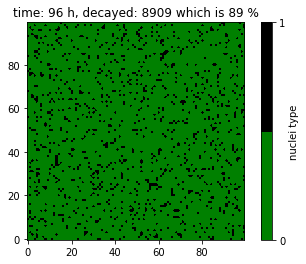



time = 97 h


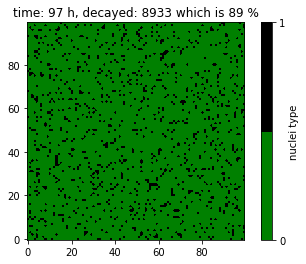



time = 98 h


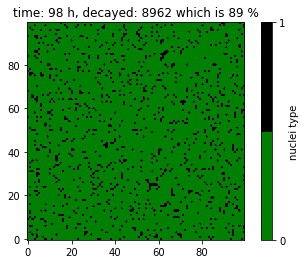



time = 99 h


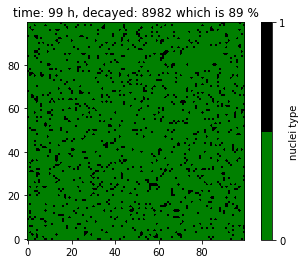



time = 100 h


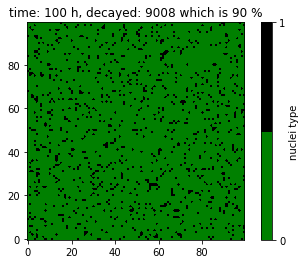



time = 101 h


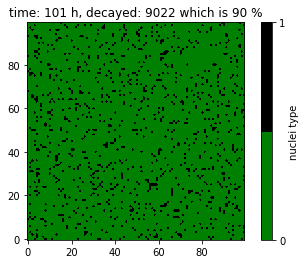



time = 102 h


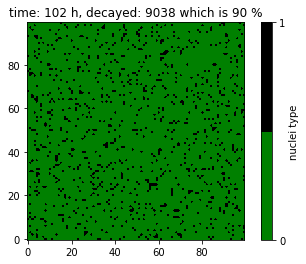



time = 103 h


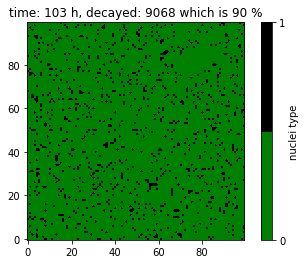



time = 104 h


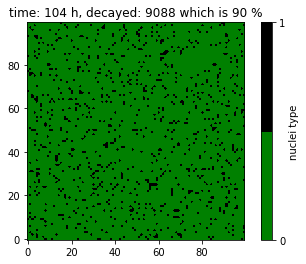



time = 105 h


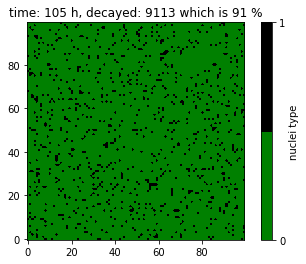



time = 106 h


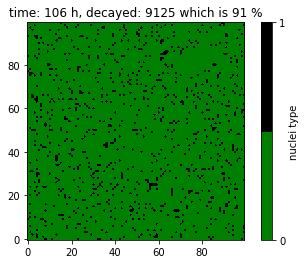



time = 107 h


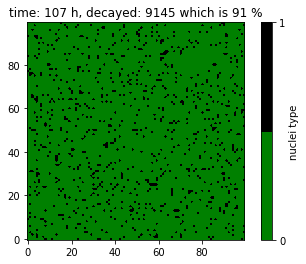



time = 108 h


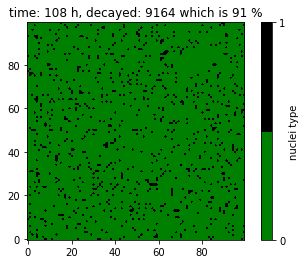



time = 109 h


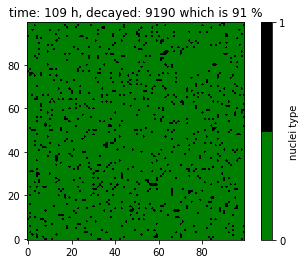



time = 110 h


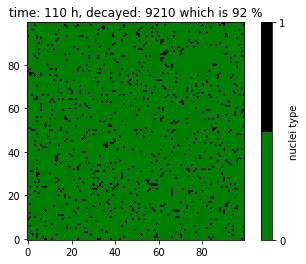



time = 111 h


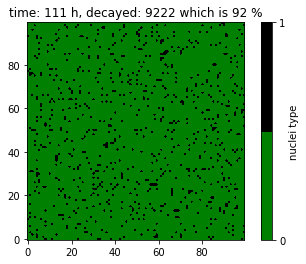



time = 112 h


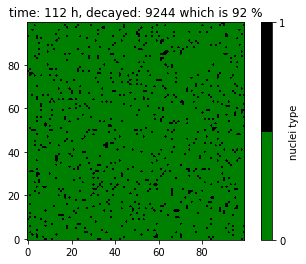



time = 113 h


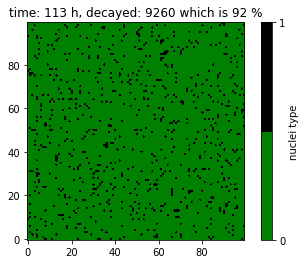



time = 114 h


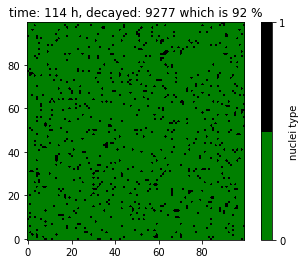



time = 115 h


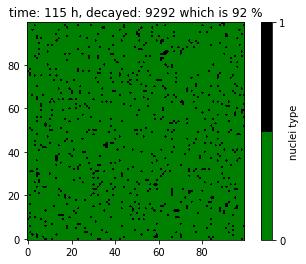



time = 116 h


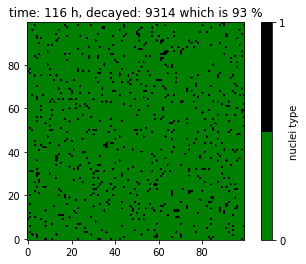



time = 117 h


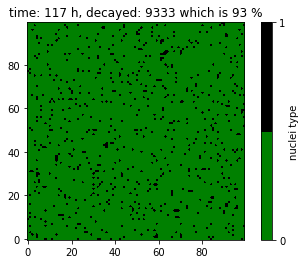



time = 118 h


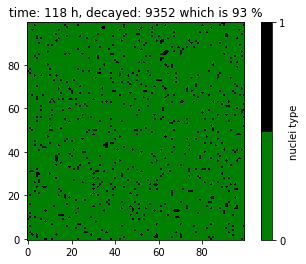



time = 119 h


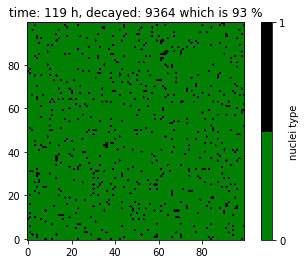



time = 120 h


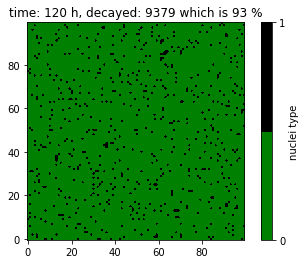



time = 121 h


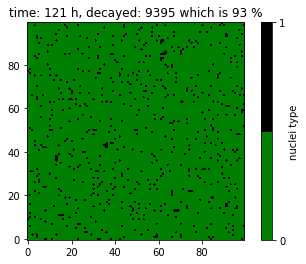



time = 122 h


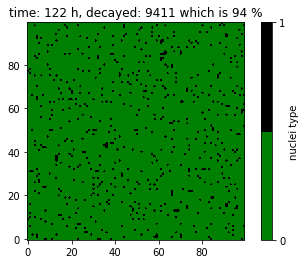



time = 123 h


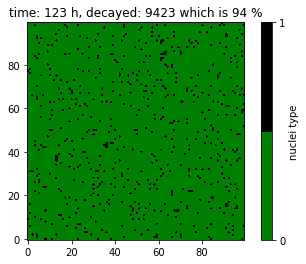



time = 124 h


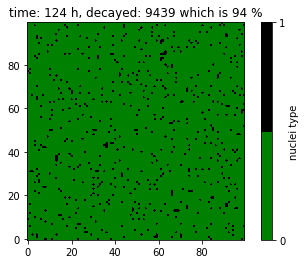



time = 125 h


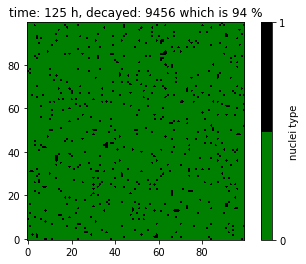



time = 126 h


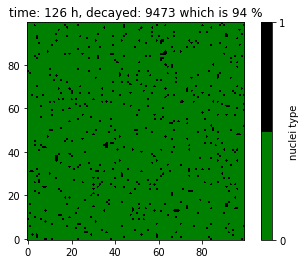



time = 127 h


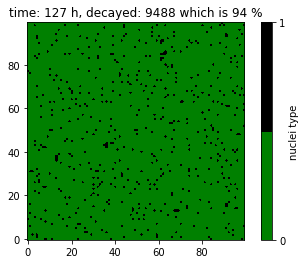



time = 128 h


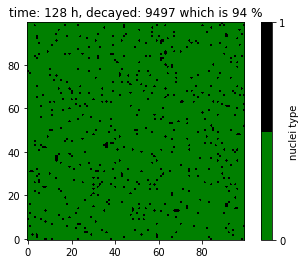



time = 129 h


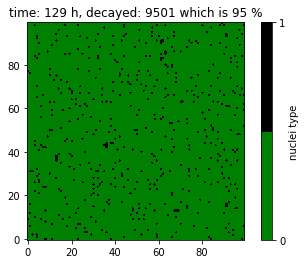



time = 130 h


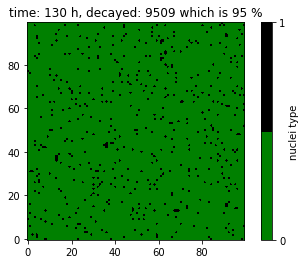



time = 131 h


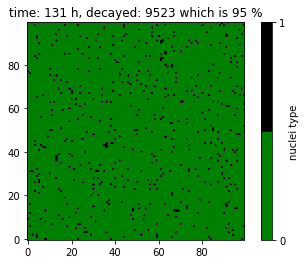



time = 132 h


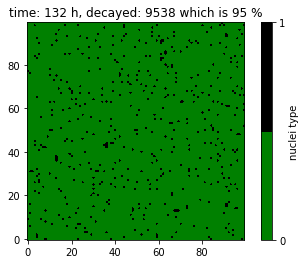



time = 133 h


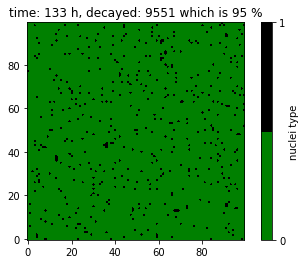



time = 134 h


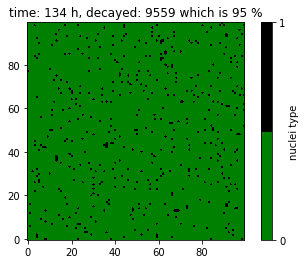



time = 135 h


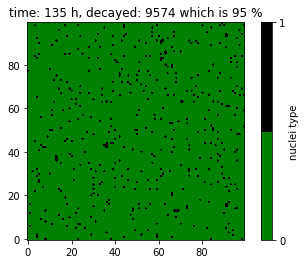



time = 136 h


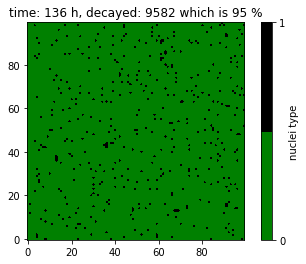



time = 137 h


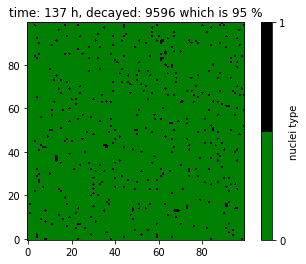



time = 138 h


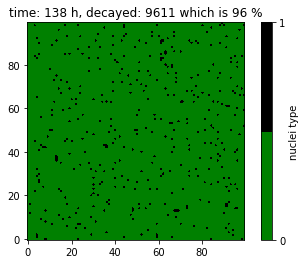



time = 139 h


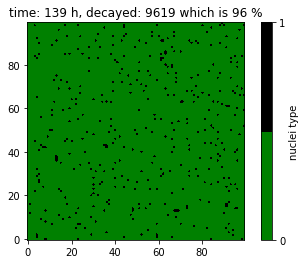



time = 140 h


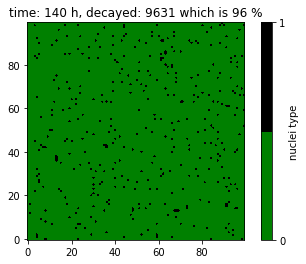



time = 141 h


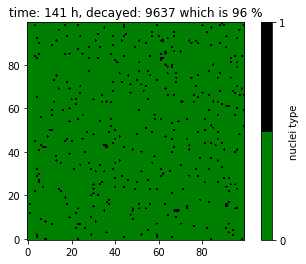



time = 142 h


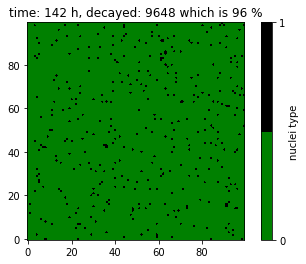



time = 143 h


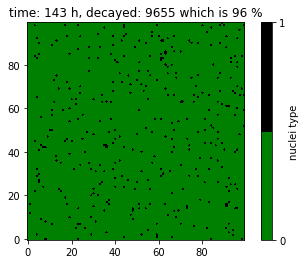



time = 144 h


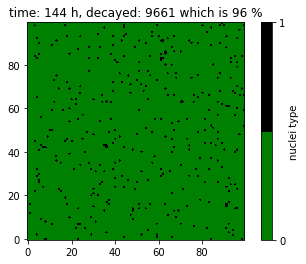



time = 145 h


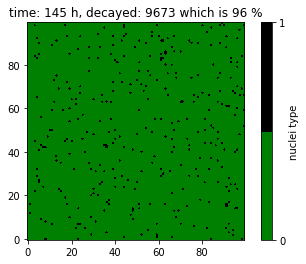



time = 146 h


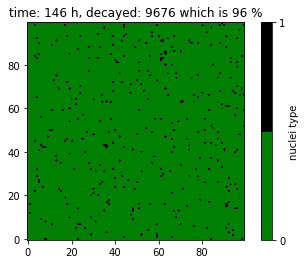



time = 147 h


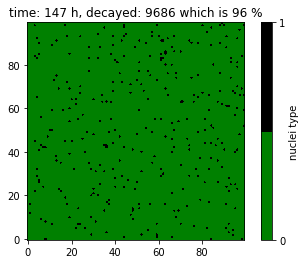



time = 148 h


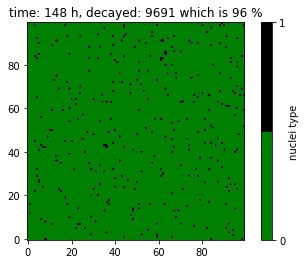



time = 149 h


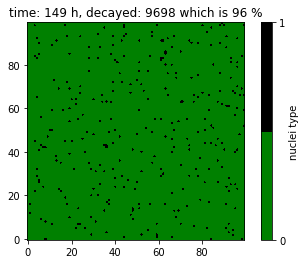



time = 150 h


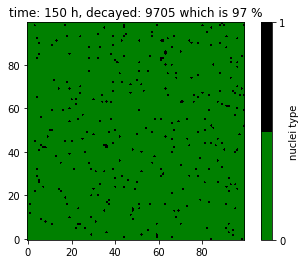



time = 151 h


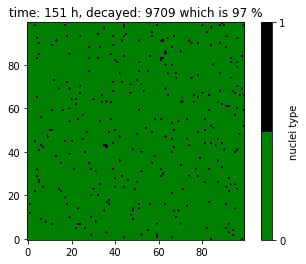



time = 152 h


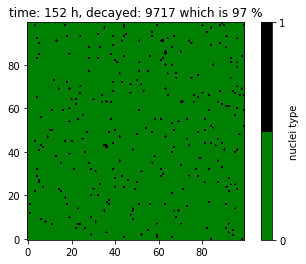



time = 153 h


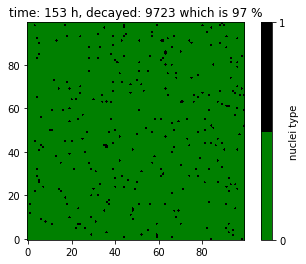



time = 154 h


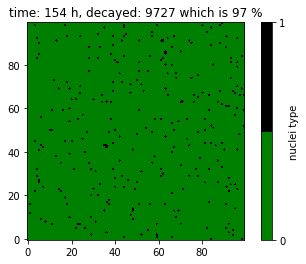



time = 155 h


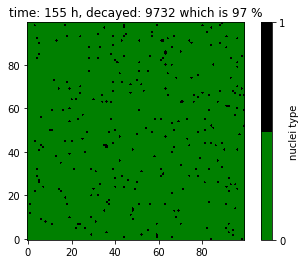



time = 156 h


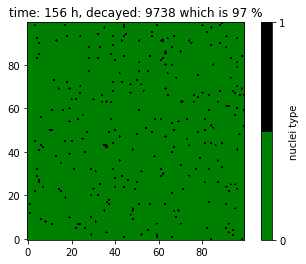



time = 157 h


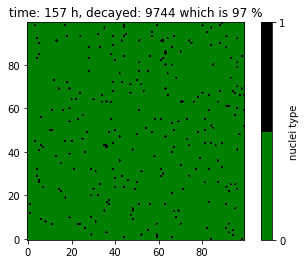



time = 158 h


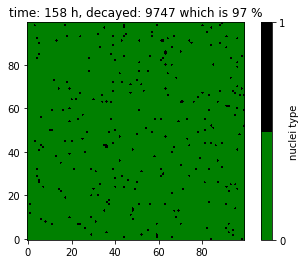



time = 159 h


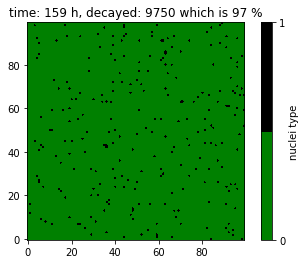



time = 160 h


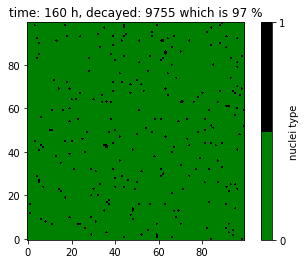



time = 161 h


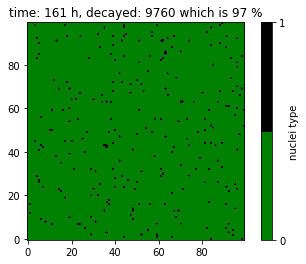



time = 162 h


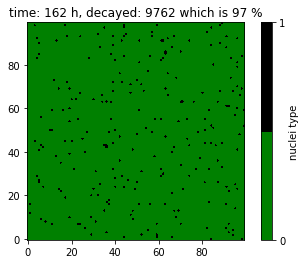



time = 163 h


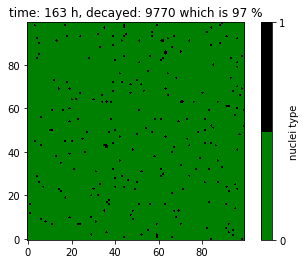



time = 164 h


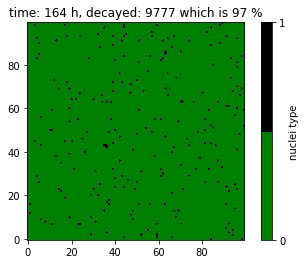



time = 165 h


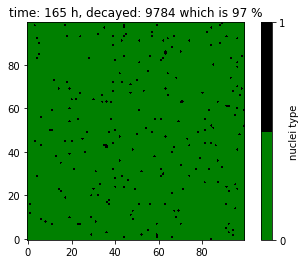



time = 166 h


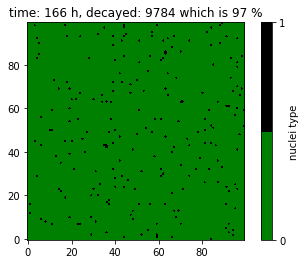



time = 167 h


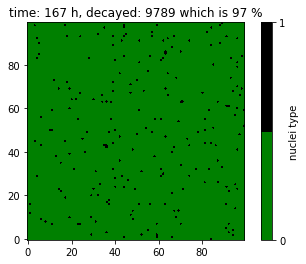



time = 168 h


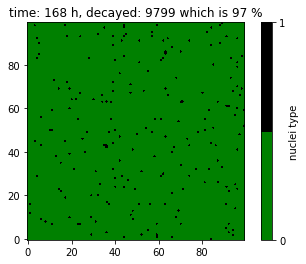



time = 169 h


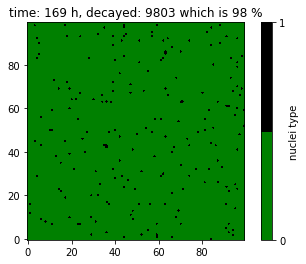



time = 170 h


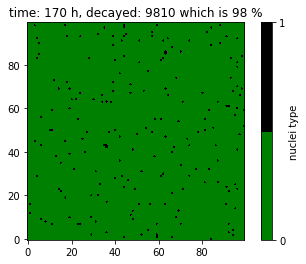



time = 171 h


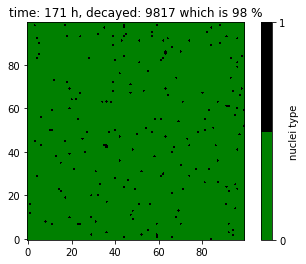



time = 172 h


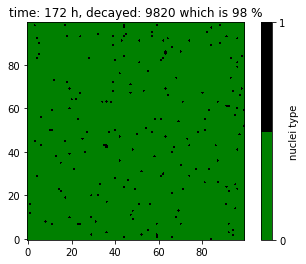



time = 173 h


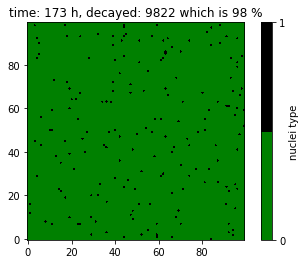



time = 174 h


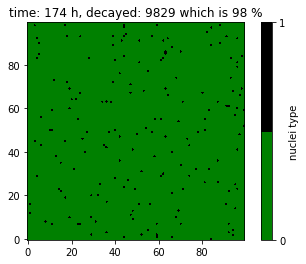



time = 175 h


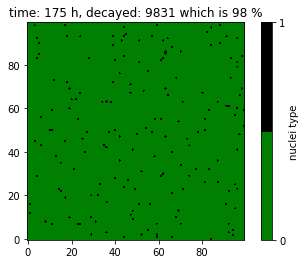



time = 176 h


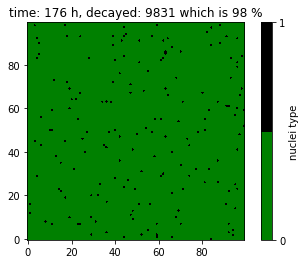



time = 177 h


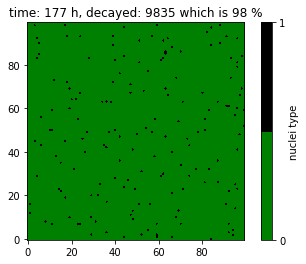



time = 178 h


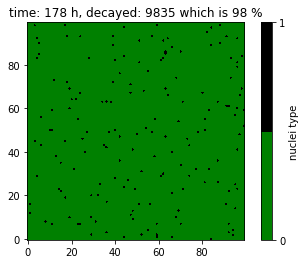



time = 179 h


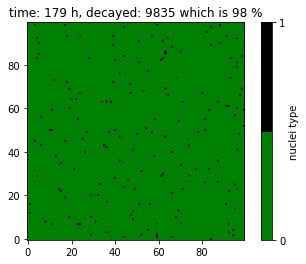

In [5]:
net = Net(size_x, size_y, half_life)

for t in range(number_of_iterations):
    print("\n\ntime = {:} h".format(t))
    net.print_my_net(t)
    nd, d = net.update(Δt)
    decay_arr[t+1] = d
    not_decay_arr[t+1] =nd
    t_arr[t+1] = t+1

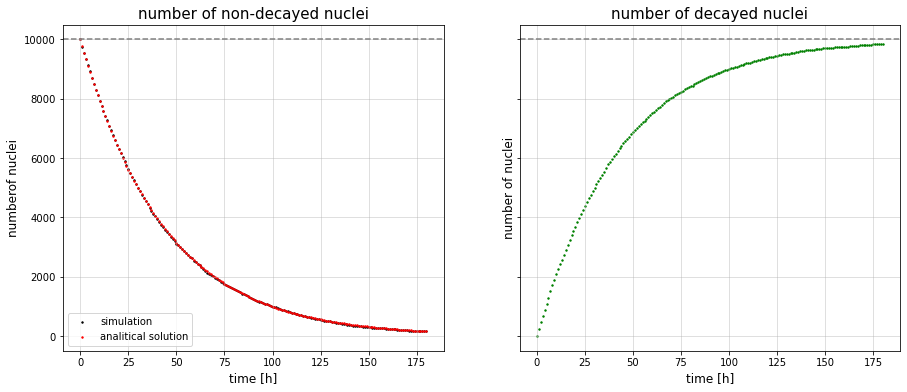

In [6]:
lambd = np.log(2)/half_life
sol = size_x * size_y * np.exp(-lambd * t_arr)   ## analitical solution


fig, axs = plt.subplots(1, 2, figsize = (15,6), sharey = True)

axs[1].scatter(t_arr, decay_arr, color = 'green', s = 2)
axs[0].scatter(t_arr, not_decay_arr, color = 'black', s = 2,  label = 'simulation')
axs[0].scatter(t_arr, sol, color = 'red', s = 2, label = 'analitical solution')

axs[1].set_title("number of decayed nuclei", fontsize=15)
axs[0].set_title("number of non-decayed nuclei", fontsize =15)

axs[1].set_xlabel("time [h]", fontsize=12)
axs[0].set_xlabel("time [h]", fontsize=12)

axs[1].set_ylabel("number of nuclei", fontsize=12)
axs[0].set_ylabel("numberof nuclei", fontsize=12)

axs[1].axhline(y=10000, color = 'gray', linestyle='--')
axs[0].axhline(y=10000, color = 'gray', linestyle='--')

axs[1].grid(True, alpha = 0.5)
axs[0].grid(True, alpha = 0.5)
axs[0].legend()